타이타닉(Titanic)은 영국의 화이트 스타 라인이 운영한 북대서양 횡단 여객선이다. 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴욕으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰하였다. 배에는 승객들을 태울 충분한 구명보트가 없었고, 타이타닉의 침몰로 2,224명의 승객 중 1,502명이 사망하였다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 라이브러리 임포트

타이타닉에서 살아남을 수 있는 승객을 예측하기

In [2]:
train = pd.read_csv('./train.csv') # 데이터 불러오기

Data Dictionary<br>

Survived : 0 = 사망, 1 = 생존<br>
Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석<br>
Sex : male = 남성, female = 여성<br>
Age : 나이<br>
SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수<br>
Parch : 타이타닉 호에 동승한 부모 / 자식의 수<br>
Ticket : 티켓 번호<br>
Fare : 승객 요금<br>
Cabin : 방 호수<br>
Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [3]:
train.head() # 상위 5개 데이터만 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info() # 유실된 값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)
    
# 그래프를 그리기 위한 코드 추가

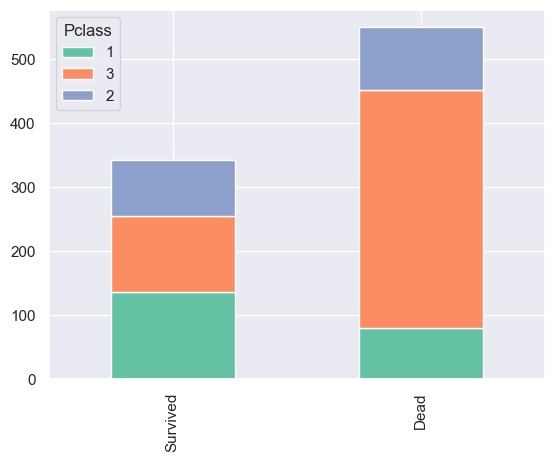

In [6]:
chart(train, 'Pclass') # 격실별 생존자 확인

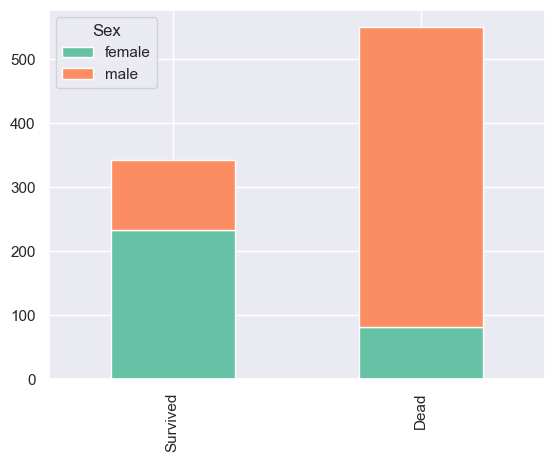

In [7]:
chart(train, 'Sex') # 성별별 생존 확인

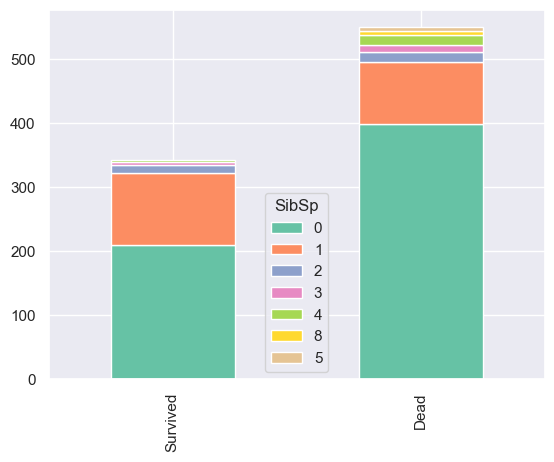

In [8]:
chart(train, 'SibSp') # 자매와 배우자의 따른 생존자 확인

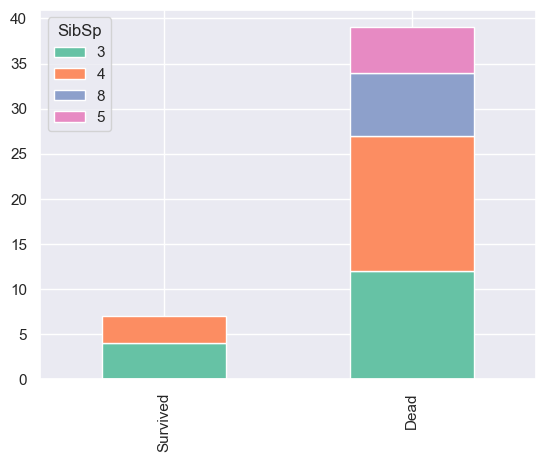

In [9]:
temp = train[(train['SibSp'] > 2)]  # 3명 이상인 사람의 생존 추가 확인
chart(temp, 'SibSp')

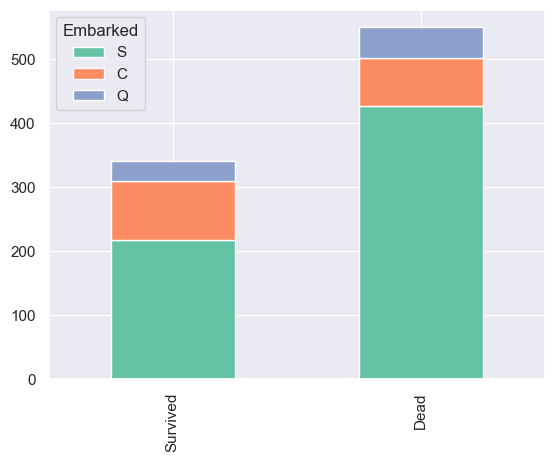

In [10]:
chart(train, 'Embarked')  # 승객별 탑승지에 따른 생존 확인

<Axes: >

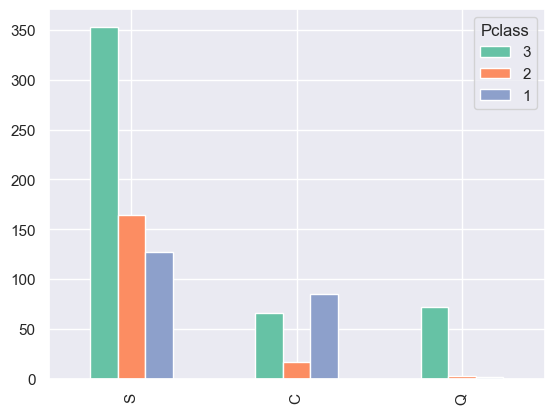

In [11]:
S = train[train['Embarked'] == 'S']['Pclass'].value_counts()
C = train[train['Embarked'] == 'C']['Pclass'].value_counts()
Q = train[train['Embarked'] == 'Q']['Pclass'].value_counts()
df = pd.DataFrame([S, C, Q])
df.index = ['S', 'C', 'Q']
df.plot(kind='bar')
# 탑승지별 1등석, 2등석, 3등석 비율 확인

In [12]:
train.info() 
# 데이터별 자료형 유실치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
dic = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(dic)
train.head()
# 기계가 학습 가능토록 성별 데이터를 숫자로 변경

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.drop('Name', axis=1, inplace=True) # 이름은 생존과 관련없는 데이터라 판단하여 삭제

In [15]:
train["Age"].fillna(train.groupby("Pclass")["Age"].transform("mean"), inplace=True) # 결측치는 성별 기준 평균 나이로 값 채움
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [16]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("mean"), inplace=True) # 승객 요금 결측치 평균치 대입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [17]:
train.drop('Ticket', axis=1, inplace=True)
train.drop('Cabin', axis=1, inplace=True)
# Cabin 격실번호는 데이터가 너무 부족하여 제거, Ticket은 생존과 무관한 것으로 판단하여 제거

In [18]:
train.isnull().sum() # 결측치 있는지 추가 확인

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [19]:
train = train.dropna(axis=0)
train.isnull().sum()
# dropna로 결측치 제거

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
dic = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(dic)
# 기계가 학습할 수 있도록 수치화

In [21]:
label = train['Survived']
train.drop('Survived', axis=1, inplace=True)
train.head()
# 학습에 활용하기 위해 정답과 피처를 분리

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0


In [22]:
train.drop('PassengerId', axis=1, inplace=True)
train.head()
# 승객 순번은 생존 확인에 불필요한 데이터로 제거

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# 머신러닝 라이브러리

In [24]:
data = train.to_numpy()
label = label.to_numpy()
# 학습가능한 넘파이 배열로 변환

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42, stratify = label)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)
# 학습과 평가 데이터 8:2로 분리 및 차원 확인

(711, 7)
(711,)
(178, 7)
(711,)


In [26]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
# 로지스틱 회구로 머신러닝 분류모델 학습

LogisticRegression()

In [27]:
train_pred = LR.predict(x_train)
test_pred = LR.predict(x_test)
# 학습이 완료된 AI 모델로 정답 예측

In [28]:
print("model score train : ", LR.score(x_train, y_train))
print("model score test : ", LR.score(x_test, y_test))
# 모델이 잘 만들어 졌는지 최종 스코어 평가

model score train :  0.8059071729957806
model score test :  0.8258426966292135
